In [19]:
# dic = {}
classes = 'beaver, dolphin, otter, seal, whale, \
aquarium fish, flatfish, ray, shark, trout, \
orchids, poppies, roses, sunflowers, tulips, \
bottles, bowls, cans, cups, plates, \
apples, mushrooms, oranges, pears, sweet peppers, \
clock, computer keyboard, lamp, telephone, television, \
bed, chair, couch, table, wardrobe, \
bee, beetle, butterfly, caterpillar, cockroach, \
bear, leopard, lion, tiger, wolf, \
bridge, castle, house, road, skyscraper, \
cloud, forest, mountain, plain, sea, \
camel, cattle, chimpanzee, elephant, kangaroo, \
fox, porcupine, possum, raccoon, skunk, \
crab, lobster, snail, spider, worm, \
baby, boy, girl, man, woman, \
crocodile, dinosaur, lizard, snake, turtle, \
hamster, mouse, rabbit, shrew, squirrel, \
maple, oak, palm, pine, willow, \
bicycle, bus, motorcycle, pickup truck, train, \
lawn-mower, rocket, streetcar, tank, tractor'

dic = classes.split(', ')


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2
** otter **


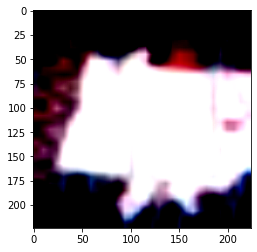

data.shape : torch.Size([128, 3, 224, 224])
target.shape : torch.Size([128])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([128, 3, 224, 224])


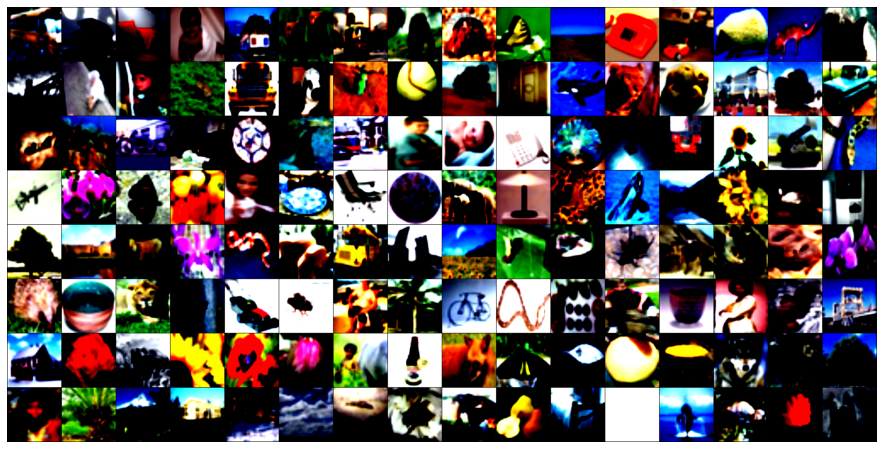

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import time
import os
import torch.backends.cudnn as cudnn

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
start_time = time.time()
batch_size = 128
learning_rate = 0.1

transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.RandomCrop(32, padding = 4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
                          std=(0.2471, 0.2436, 0.2616))
])


train_dataset = datasets.CIFAR100(root='/home/ljj0512/private/project/data',
                                 train=True,
                                 transform=transform_train,
                                 download=True)

test_dataset = datasets.CIFAR100(root='/home/ljj0512/private/project/data',
                                train=False,
                                transform=transform_test,
                                download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=2)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=2)


import matplotlib.pyplot as plt
from torchvision.utils import make_grid

for idx, (data, target) in enumerate(train_loader):
    if idx == 1:
        break

    print(target[0].item())
    print('**',dic[target[0].item()],'**')
    plt.imshow(data[0].permute(1,2,0))
    plt.show()
    print('data.shape :',data.shape) # batch_size, C, H, W
    print('target.shape :',target.shape)
    print()


for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break
plt.show()